In [51]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import SwapGate, CXGate
from qiskit.quantum_info import random_unitary
from weylchamber import c1c2c3, g1g2g3, WeylChamber, canonical_gate
import matplotlib.pyplot as plt
from monodromy.haar import gates_to_haar
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Operator
from monodromy.haar import expected_cost, gates_to_coverage
from monodromy.render import _plot_coverage_set
from qiskit.circuit.library import iSwapGate, XXPlusYYGate, CXGate
import numpy as np
from monodromy.render import _plot_coverage_set
from monodromy.coverage import gates_to_coverage
from monodromy.render import gates_to_coverage_plot
from monodromy.haar import expected_cost
from monodromy.coverage import coverage_lookup_operation, target_build_ansatz

# %matplotlib widget

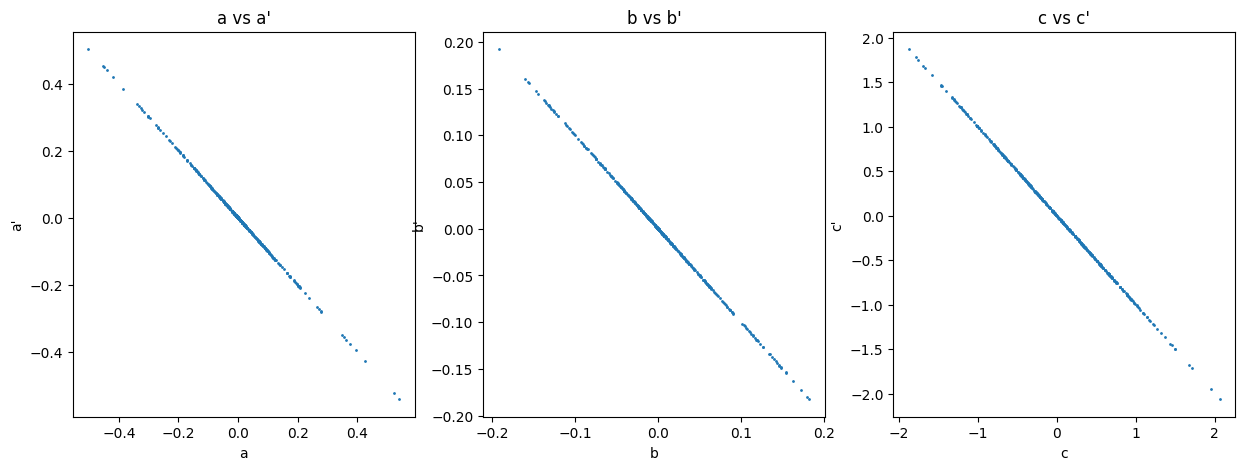

In [52]:
N = 500
# generate (a,b,c) ->swap-> (a',b',c') pairs
a_pairs, b_pairs, c_pairs = [], [], []
for _ in range(N):
    U = random_unitary(4).data
    U_prime = SwapGate().to_matrix() @ U
    abc = g1g2g3(U)
    abc_prime = g1g2g3(U_prime)
    a_pairs.append((abc[0], abc_prime[0]))
    b_pairs.append((abc[1], abc_prime[1]))
    c_pairs.append((abc[2], abc_prime[2]))
# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (pairs, label) in enumerate(zip([a_pairs, b_pairs, c_pairs], ["a", "b", "c"])):
    axes[i].scatter(*zip(*pairs), s=1)
    axes[i].set_xlabel(f"{label}")
    axes[i].set_ylabel(f"{label}'")
    axes[i].set_title(f"{label} vs {label}'")
plt.show()

In [53]:
# U = FSim(np.pi/2, np.pi/6)
# U2 = U.power(1/2)
# U = CXGate().power(1 / 4)
U = iSwapGate().power(1 / 5)
U2 = iSwapGate().power(1 / 6)
U3 = iSwapGate().power(1 / 7)
U4 = iSwapGate().power(1 / 8)
# target = random_unitary(4)
target = UnitaryGate(canonical_gate(0.5, 0.25, 0.25))

In [55]:
# coverage_1 = gates_to_coverage_plot(U, U2, U3, costs=[0.5, 0.25, 0.75])
# coverage_1 = gates_to_coverage_plot(U, U2, U3, costs=[0.5, 0.25, 0.125])
coverage_1 = gates_to_coverage_plot(U, U4, costs=[1 / 5, 1 / 8])
print(expected_cost(coverage_1))  # print(gates_to_haar(U))
coverage_1 = gates_to_coverage_plot(U2, U4, costs=[1 / 6, 1 / 8])
print(expected_cost(coverage_1))  # print(gates_to_haar(U))
coverage_1 = gates_to_coverage_plot(U3, U4, costs=[1 / 7, 1 / 8])
print(expected_cost(coverage_1))  # print(gates_to_haar(U))

Cost of unitary is 1.0


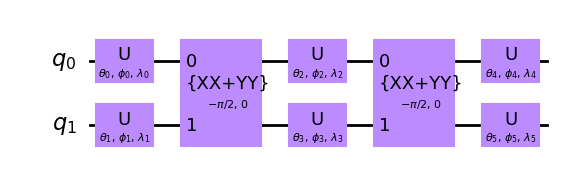

In [ ]:
target_build_ansatz(coverage_set=coverage_1, target=target).draw("mpl")

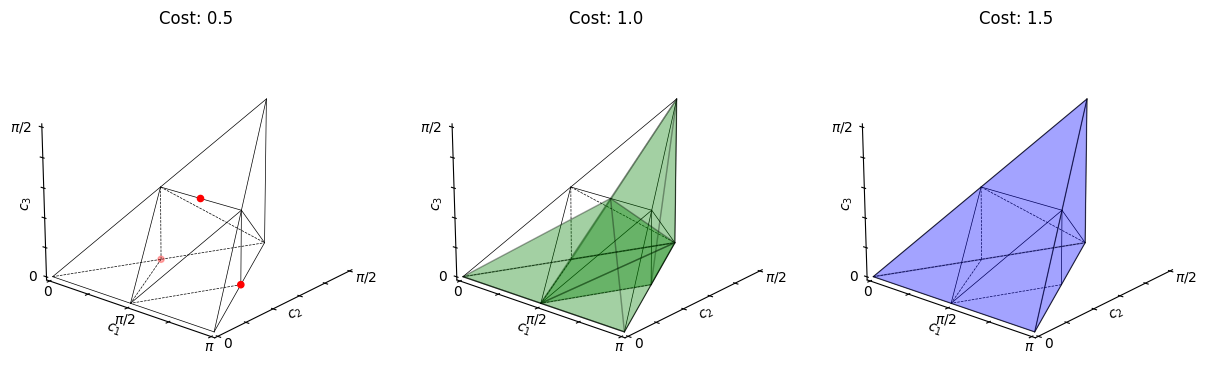

1.0281925224994684


In [ ]:
# coverage_2 = gates_to_coverage_plot(U, U2, U3, SwapGate(), costs=[0.5, 0.25, 0.75, 0])
coverage_2 = gates_to_coverage_plot(U, SwapGate(), costs=[0.5, 0])
print(expected_cost(coverage_2))

Cost of unitary is 0.5


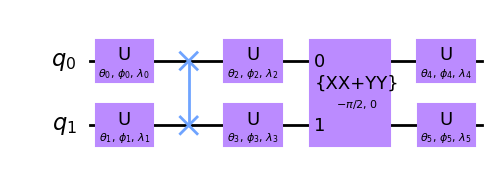

In [ ]:
target_build_ansatz(coverage_set=coverage_2, target=target).draw("mpl")

In [ ]:
# coverage = gates_to_coverage(
#     # iSwapGate(),
#     iSwapGate().power(3 / 4),
#     iSwapGate().power(1 / 2),
#     iSwapGate().power(1 / 4),
#     costs=[.75, .5, 0.25],
# )
# _plot_coverage_set(coverage)
# print(expected_cost(coverage))

In [ ]:
# # experiment with random scattering
# N = 10
# # generate U + SWAP + U + SWAP
# U = iSwapGate().power(3/4)
# coords = []
# for _ in range(N):

#     qc = QuantumCircuit(2)

#     qc.append(U, [0, 1])
#     # random 1Q gate
#     # qc.append(random_unitary(2).to_instruction(), [0])
#     # qc.append(random_unitary(2).to_instruction(), [1])
#     # qc.append(U, [0, 1])
#     # qc.append(random_unitary(2).to_instruction(), [0])
#     # qc.append(random_unitary(2).to_instruction(), [1])
#     # qc.swap(0,1)

#     # get coordinates
#     coords.append(c1c2c3(Operator(qc).data))

# # plot
# w = WeylChamber()
# for c in coords:
#     w.add_point(*c)
# w.plot()